In [1]:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

base_path = "/content/drive/MyDrive/AdvnacedCV/dataset"
splits = ["train/images", "valid/images", "test/images"]

for split in splits:
    num_images = len(os.listdir(os.path.join(base_path, split)))
    print(f"Number of images in {split}: {num_images}")


Number of images in train/images: 744
Number of images in valid/images: 67
Number of images in test/images: 34


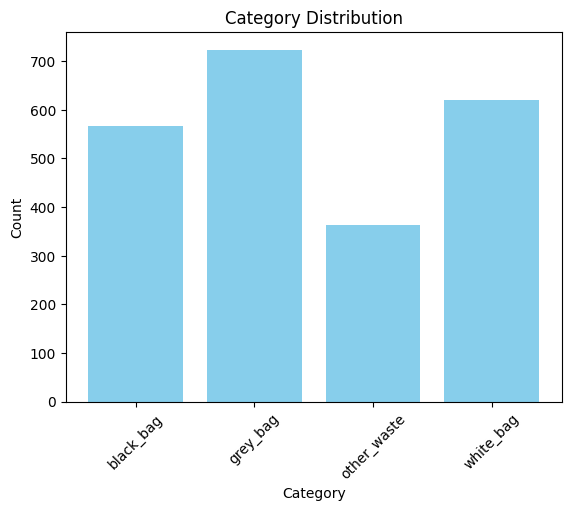

In [3]:
import os
import glob
import matplotlib.pyplot as plt

# Category mapping based on data.yaml
category_mapping = {0: "black_bag", 1: "grey_bag", 2: "other_waste", 3: "white_bag"}

# Initialize a dictionary to count occurrences for each category
category_counts = {category: 0 for category in category_mapping.values()}

# Path to annotation files (adjust to your dataset folder)
base_path = "/content/drive/MyDrive/AdvnacedCV/dataset"  # Path where your dataset is extracted
annotation_folders = ["train/labels", "valid/labels", "test/labels"]  # Subdirectories for annotations

# Collect all annotation file paths
annotation_file_paths = []
for folder in annotation_folders:
    annotation_file_paths.extend(glob.glob(os.path.join(base_path, folder, "*.txt")))

# Parse annotation files and count occurrences per class
for file in annotation_file_paths:
    with open(file, 'r') as f:
        for line in f:
            class_id = int(line.split()[0])  # Extract the class ID from YOLO format
            category_counts[category_mapping[class_id]] += 1

# Plot category distribution
plt.bar(category_counts.keys(), category_counts.values(), color='skyblue')
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


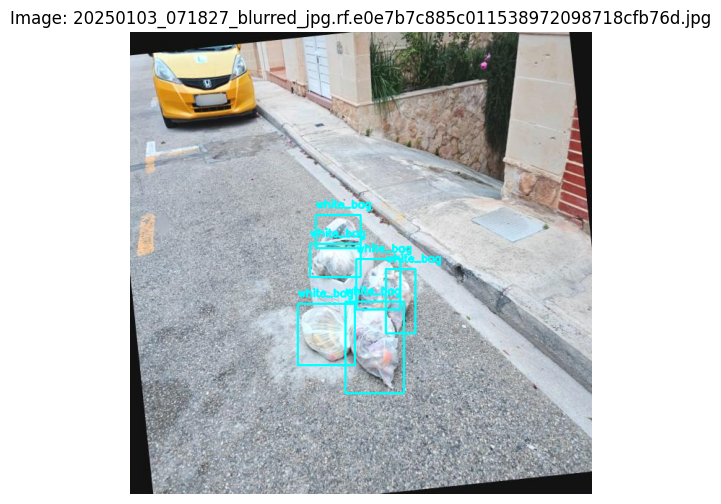

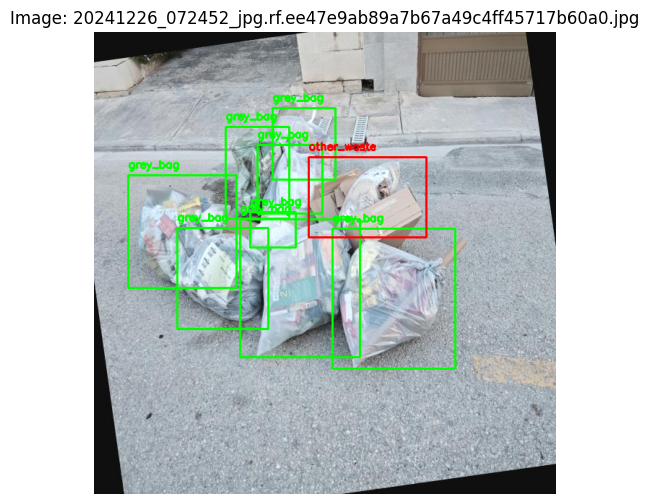

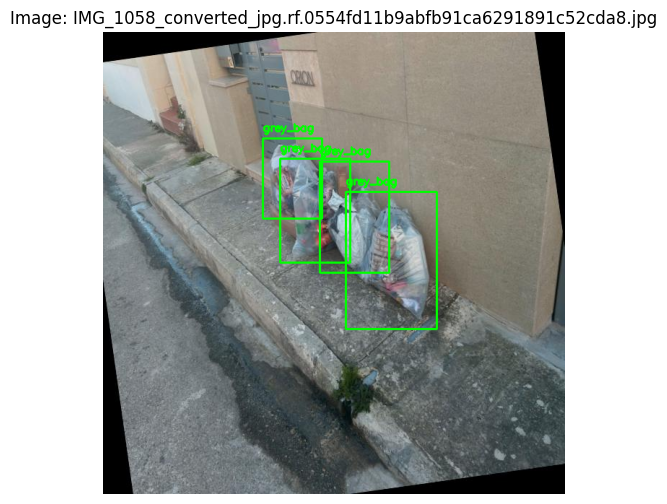

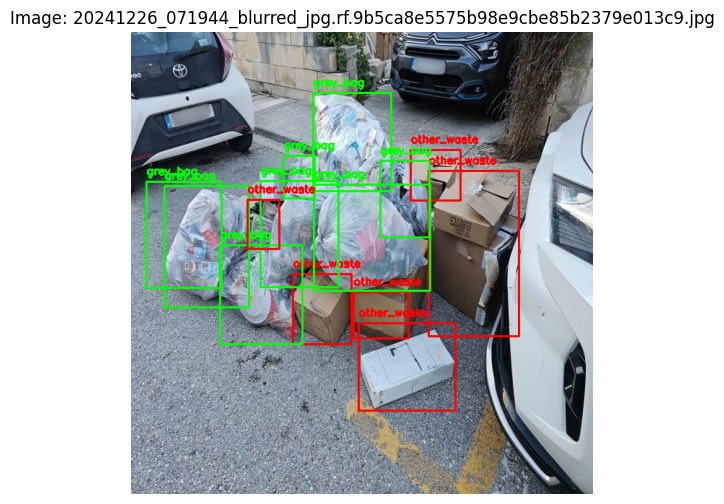

In [4]:
import cv2
import matplotlib.pyplot as plt
import os
import random

def draw_annotations(image_path, annotation_path, category_mapping, color_mapping):

    image = cv2.imread(image_path)
    height, width, _ = image.shape

    if os.path.exists(annotation_path):
        with open(annotation_path, 'r') as f:
            for line in f:

                class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())
                x_center, y_center, box_width, box_height = (
                    x_center * width, y_center * height, box_width * width, box_height * height
                )
                x1 = int(x_center - box_width / 2)
                y1 = int(y_center - box_height / 2)
                x2 = int(x_center + box_width / 2)
                y2 = int(y_center + box_height / 2)

                color = color_mapping[int(class_id)]
                label = category_mapping[int(class_id)]

                cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
                cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Path to dataset
base_path = "/content/drive/MyDrive/AdvnacedCV/dataset"
images_path = os.path.join(base_path, "train/images")
labels_path = os.path.join(base_path, "train/labels")

# gather all images
image_files = [f for f in os.listdir(images_path) if f.endswith(".jpg")]
sample_images = random.sample(image_files, 3)  # chooses 3 random images

category_mapping = {0: "black_bag", 1: "grey_bag", 2: "other_waste", 3: "white_bag"}

color_mapping = {
    0: (255, 0, 0),
    1: (0, 255, 0),
    2: (0, 0, 255),
    3: (255, 255, 0)
}


# Visualize sample images with annotations
for image_file in sample_images:
    image_path = os.path.join(images_path, image_file)
    annotation_path = os.path.join(labels_path, image_file.replace(".jpg", ".txt"))

    annotated_image = draw_annotations(image_path, annotation_path, category_mapping, color_mapping)

    # Display the annotated image
    plt.figure(figsize=(8, 6))
    plt.imshow(annotated_image)
    plt.axis("off")
    plt.title(f"Image: {image_file}")
    plt.show()

specific_image_path = "/content/drive/MyDrive/AdvnacedCV/dataset/train/images/20241226_071944_blurred_jpg.rf.9b5ca8e5575b98e9cbe85b2379e013c9.jpg"
specific_annotation_path = "/content/drive/MyDrive/AdvnacedCV/dataset/train/labels/20241226_071944_blurred_jpg.rf.9b5ca8e5575b98e9cbe85b2379e013c9.txt"

annotated_specific_image = draw_annotations(specific_image_path, specific_annotation_path, category_mapping, color_mapping)
plt.figure(figsize=(8, 6))
plt.imshow(annotated_specific_image)
plt.axis("off")
plt.title("Image: 20241226_071944_blurred_jpg.rf.9b5ca8e5575b98e9cbe85b2379e013c9.jpg")
plt.show()

